In [58]:
from __future__ import unicode_literals, print_function, division
import numpy as np
import torch

train_data_source = "C:/Users/sdat7/home/git_commit/AI_Project/study/Ajou/[2021 Spring Class] Ajou ML by JBR/train_data.npy"
train_label_source = "C:/Users/sdat7/home/git_commit/AI_Project/study/Ajou/[2021 Spring Class] Ajou ML by JBR/train_label.npy"
data_np = np.load(train_data_source, allow_pickle=True)
label_np = np.load(train_label_source, allow_pickle=True)

all_label = ['18k','17k','16k','15k','14k','13k','12k','11k','10k','9k',
'8k','7k','6k','5k','4k','3k','2k','1k','1d','2d','3d','4d','5d','6d','7d','8d','9d']

n_label = len(all_label) # 18k ~ 1k, 1d ~ 9d, pro
print("number of label: ", n_label)


number of label:  27


In [84]:
import matplotlib.pyplot as plt
# a = torch.tensor(data_np[0][0][0]) 
# 1. 경기 2. 턴 3. 인덱스
# a = a.view(1,361)
# print(data_np[0][0].shape)
# plt.imshow(data_np[0][5][0])

def gameToTensor(game):
  tensor = torch.FloatTensor(len(game),1 ,361)
  nth_turn = 0

  for turn in game:
    turns = turn[0].astype(np.float64)
    x = torch.tensor(turns, requires_grad=True)
    turn_tensor = x.clone().detach().requires_grad_(True)
    # print(turn_tensor)
    turn_tensor = turn_tensor.view(361)
    print(turn_tensor)

    tensor[nth_turn] = turn_tensor.clone().detach()
    nth_turn += 1

  return tensor

t = gameToTensor(data_np[1])

tensor([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0., -1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  

In [6]:
import torch.nn as nn

class RNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(RNN, self).__init__()

        self.hidden_size = hidden_size
        self.i2h = nn.Linear(input_size + hidden_size, hidden_size) # y =Wx
        self.i2o = nn.Linear(input_size + hidden_size, output_size)
        self.softmax = nn.LogSoftmax(dim=1) 

    def forward(self, input, hidden):
        combined = torch.cat((input, hidden), 1)
        hidden = self.i2h(combined)
        output = self.i2o(combined)
        output = self.softmax(output)
        return output, hidden

    def initHidden(self):
        return torch.zeros(1, self.hidden_size)

n_hidden = 128
rnn = RNN(361, n_hidden, n_label)

In [8]:
hidden = torch.zeros(1, n_hidden)

output, next_hidden = rnn(t[0], hidden)
print(output)

tensor([[-3.3158, -3.3419, -3.3521, -3.3036, -3.3012, -3.2923, -3.3649, -3.2339,
         -3.2652, -3.2962, -3.3368, -3.2874, -3.2318, -3.3611, -3.3001, -3.2820,
         -3.2697, -3.2826, -3.3003, -3.2821, -3.3293, -3.3378, -3.3051, -3.2792,
         -3.2108, -3.3158, -3.2297]], grad_fn=<LogSoftmaxBackward>)


In [9]:
def categoryFromOutput(output):
  top_n, top_i = output.topk(1) # 텐서의 가장 큰 값 및 주소
  category_i = top_i[0].item()     # 텐서에서 정수 값으로 변경
  return all_label[category_i], category_i

print(categoryFromOutput(output))

('7d', 24)


In [10]:
import random

def randomTrainingExample():
    n = random.randint(0,2681)
    label = label_np[n]
    game = gameToTensor(data_np[n])
    category_tensor = torch.tensor([all_label.index(label)], dtype=torch.long)
    
    return label, n, category_tensor, game

for i in range(10):
    category, line, category_tensor, line_tensor = randomTrainingExample()
    print('category =', category, '/ line =', line)

category = 7d / line = 1507
category = 8d / line = 1673
category = 6k / line = 1417
category = 14k / line = 2295
category = 1d / line = 210
category = 3k / line = 668
category = 12k / line = 2056
category = 5d / line = 1048
category = 9k / line = 2
category = 6k / line = 1335


In [11]:
criterion = nn.NLLLoss()

In [12]:
learning_rate = 0.01 # 이것을 너무 높게 설정하면 발산할 수 있고, 너무 낮으면 학습이 되지 않을 수 있습니다.

def train(category_tensor, line_tensor):
    hidden = rnn.initHidden()

    rnn.zero_grad()

    for i in range(line_tensor.size()[0]):
        output, hidden = rnn(line_tensor[i], hidden)

    loss = criterion(output, category_tensor)
    loss.backward()

    # 매개변수의 경사도에 학습률을 곱해서 그 매개변수의 값에 더합니다.
    for p in rnn.parameters():
        p.data.add_(p.grad.data, alpha=-learning_rate)

    return output, loss.item()

In [13]:
import time
import math

n_iters = 10000
print_every = 500
plot_every = 100

# 도식화를 위한 손실 추적
current_loss = 0
all_losses = []

def timeSince(since):
    now = time.time()
    s = now - since
    m = math.floor(s / 60)
    s -= m * 60
    return '%dm %ds' % (m, s)

start = time.time()

for iter in range(1, n_iters + 1):
    category, line, category_tensor, line_tensor = randomTrainingExample()
    output, loss = train(category_tensor, line_tensor)
    current_loss += loss

    # iter 숫자, 손실, 이름, 추측 화면 출력
    if iter % print_every == 0:
        guess, guess_i = categoryFromOutput(output)
        correct = '✓' if guess == category else '✗ (%s)' % category
        print('%d %d%% (%s) %.4f %s / %s %s' % (iter, iter / n_iters * 100, timeSince(start), loss, line, guess, correct))

    # 현재 평균 손실을 전체 손실 리스트에 추가
    if iter % plot_every == 0:
        all_losses.append(current_loss / plot_every)
        current_loss = 0

500 5% (1m 4s) 3.4347 2565 / 9k ✗ (16k)
1000 10% (2m 14s) 2.9321 1712 / 18k ✗ (8d)
1500 15% (3m 18s) 0.8545 2579 / 17k ✓
2000 20% (4m 26s) 0.1035 1351 / 6k ✓
2500 25% (5m 35s) 2.6666 1254 / 3d ✗ (6d)
3000 30% (6m 43s) 3.3271 782 / 4k ✗ (4d)
3500 35% (7m 48s) 2.0731 1847 / 17k ✗ (8k)
4000 40% (8m 53s) 5.0254 2246 / 1k ✗ (14k)
4500 45% (9m 59s) 3.3683 275 / 9k ✗ (1k)
5000 50% (11m 9s) 3.1376 184 / 7k ✗ (1d)
5500 55% (12m 19s) 2.5594 1540 / 5d ✗ (7d)
6000 60% (13m 29s) 2.3657 1573 / 12k ✗ (7k)
6500 65% (14m 36s) 2.0821 1760 / 16k ✗ (8d)
7000 70% (15m 46s) 1.9170 704 / 7k ✗ (3k)
7500 75% (16m 56s) 7.1092 2321 / 10k ✗ (14k)
8000 80% (18m 7s) 2.0319 2449 / 14k ✗ (15k)
8500 85% (19m 27s) 4.7522 953 / 2k ✗ (4k)
9000 90% (20m 44s) 0.8204 1689 / 10k ✓
9500 95% (21m 55s) 2.5626 1228 / 8d ✗ (6d)
10000 100% (23m 11s) 0.7505 2119 / 12k ✓


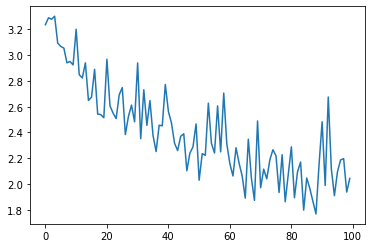

In [14]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

plt.figure()
plt.plot(all_losses)

<ipython-input-15-66b3b108bf4e>:33: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([''] + all_label, rotation=90)
<ipython-input-15-66b3b108bf4e>:34: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''] + all_label)


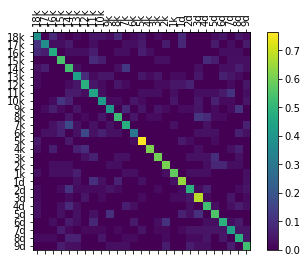

In [15]:
# 혼란 행렬에서 정확한 추측을 추적
confusion = torch.zeros(n_label, n_label)
n_confusion = 1000

# 주어진 라인의 출력 반환
def evaluate(line_tensor):
    hidden = rnn.initHidden()

    for i in range(line_tensor.size()[0]):
        output, hidden = rnn(line_tensor[i], hidden)

    return output

# 예시들 중에 어떤 것이 정확하게 예측되었는지 기록
for i in range(n_confusion):
    category, line, category_tensor, line_tensor = randomTrainingExample()
    output = evaluate(line_tensor)
    guess, guess_i = categoryFromOutput(output)
    category_i = all_label.index(category)
    confusion[category_i][guess_i] += 1

# 모든 행을 합계로 나누어 정규화
for i in range(n_label):
    confusion[i] = confusion[i] / confusion[i].sum()

# 도식 설정
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(confusion.numpy())
fig.colorbar(cax)

# 축 설정
ax.set_xticklabels([''] + all_label, rotation=90)
ax.set_yticklabels([''] + all_label)

# 모든 tick에서 레이블 지정
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax.yaxis.set_major_locator(ticker.MultipleLocator(1))

# sphinx_gallery_thumbnail_number = 2
plt.show()

In [44]:
results_level = []
def predict(n, input_line, n_predictions=3):
    # print('\n> %s' % n)

    with torch.no_grad():
        output = evaluate(gameToTensor(input_line))

        # Get top N categories
        topv, topi = output.topk(n_predictions, 1, True)
        predictions = []

        for i in range(n_predictions):
            value = topv[0][i].item()
            category_index = topi[0][i].item()
            results_level.append(all_label[category_index])
            # print('(%.2f) %s' % (value, all_label[category_index]))
            predictions.append([value, all_label[category_index]])

In [45]:
test_data_source = 'C:/Users/sdat7/home/git_commit/AI_Project/study/Ajou/[2021 Spring Class] Ajou ML by JBR/test_data.npy'
test_np = np.load(test_data_source, allow_pickle=True)

# n_games = len(test_np)
for i in range(2689):
    
    f = gameToTensor(test_np[i])
    predict(i, f, 1)

print(len(results_label),len(results_level))



> 0

> 1

> 2

> 3

> 4

> 5

> 6

> 7
<ipython-input-5-0cf201955280>:10: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(turn[0])

> 8

> 9

> 10

> 11

> 12

> 13

> 14

> 15

> 16

> 17

> 18

> 19

> 20

> 21

> 22

> 23

> 24

> 25

> 26

> 27

> 28

> 29

> 30

> 31

> 32

> 33

> 34

> 35

> 36

> 37

> 38

> 39

> 40

> 41

> 42

> 43

> 44

> 45

> 46

> 47

> 48

> 49

> 50

> 51

> 52

> 53

> 54

> 55

> 56

> 57

> 58

> 59

> 60

> 61

> 62

> 63

> 64

> 65

> 66

> 67

> 68

> 69

> 70

> 71

> 72

> 73

> 74

> 75

> 76

> 77

> 78

> 79

> 80

> 81

> 82

> 83

> 84

> 85

> 86

> 87

> 88

> 89

> 90

> 91

> 92

> 93

> 94

> 95

> 96

> 97

> 98

> 99

> 100

> 101

> 102

> 103

> 104

> 105

> 106

> 107

> 108

> 109

> 110

> 111

> 112

> 113

> 114

> 115

> 116

> 117

> 118

> 119

> 120

> 1

In [54]:
z = np.load("C:/Users/sdat7/home/git_commit/AI_Project/study/Ajou/[2021 Spring Class] Ajou ML by JBR/test_label2.npy", allow_pickle=True)

t = 0
ft = 0

long = len(results_level)
for i in range(long):
    if z[i] == results_level[i]:
        t += 1
    else:
        ft += 1

percent = t/(t+ft)


결과 0 %결과 0 %결과 0 %결과 0 %결과 0 %결과 0 %결과 0 %결과 0 %결과 0 %결과 0 %결과 0 %결과 0 %결과 0 %결과 0 %결과 0 %결과 0 %결과 0 %결과 0 %결과 0 %결과 0 %결과 0 %결과 0 %결과 0 %결과 0 %결과 0 %결과 0 %결과 0 %결과 0 %결과 0 %결과 0 %결과 0 %결과 0 %결과 0 %결과 0 %결과 0 %결과 0 %결과 0 %결과 0 %결과 0 %결과 0 %결과 0 %결과 0 %결과 0 %결과 0 %결과 0 %결과 0 %결과 0 %결과 0 %결과 0 %결과 0 %결과 0 %결과 0 %결과 0 %결과 0 %결과 0 %결과 0 %결과 0 %결과 0 %결과 0 %결과 0 %결과 0 %결과 0 %결과 0 %결과 0 %결과 0 %결과 0 %결과 0 %결과 0 %결과 0 %결과 0 %결과 0 %결과 0 %결과 0 %결과 0 %결과 0 %결과 0 %결과 0 %결과 0 %결과 0 %결과 0 %결과 0 %결과 0 %결과 0 %결과 0 %결과 0 %결과 0 %결과 0 %결과 0 %결과 0 %결과 0 %결과 0 %결과 0 %결과 0 %결과 0 %결과 0 %결과 0 %결과 0 %결과 0 %결과 0 %결과 0 %
